In [5]:
import pandas as pd

# Load the Excel file
file_path = "diabetes_prediction_dataset updated.xlsx"
df = pd.read_excel(file_path, sheet_name='diabetes_prediction_dataset_upd')

# ----- Step 1: Summary Statistics -----
print("Summary Statistics:")
print(df.describe())

# ----- Step 2: Data Cleaning -----

# 1. Remove duplicate rows
initial_shape = df.shape
df = df.drop_duplicates()
print(f"\nRemoved {initial_shape[0] - df.shape[0]} duplicate rows.")

# 2. Standardize Smoking_History categories
df['Smoking_History'] = df['Smoking_History'].replace({
    'No Info': 'unknown',
    'never': 'never',
    'current': 'current',
    'former': 'former',
    'ever': 'former',
    'not current': 'former'
})

# 3. Check unique values after cleaning
print("\nUnique Smoking_History categories after cleaning:")
print(df['Smoking_History'].unique())

# 4. Detect BMI outliers
bmi_outliers = df[df['BMI'] > 60]
print(f"\nNumber of BMI outliers (> 60): {bmi_outliers.shape[0]}")

# 5. (Optional) Remove BMI outliers
df = df[df['BMI'] <= 60]

# Save the cleaned data (optional)
df.to_csv("cleaned_diabetes_data.csv", index=False)
print("\nCleaned data saved to 'cleaned_diabetes_data.csv'.")


Summary Statistics:
                 Age  Hypertension  Heart_Disease            BMI  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       42.672870       0.07485       0.039420      27.320767   
std        22.088678       0.26315       0.194593       6.636783   
min         1.000000       0.00000       0.000000      10.010000   
25%        25.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        88.000000       1.00000       1.000000      95.690000   

         HbA1c_Level  Blood_Glucose_Level       Diabetes  Lifestyle_Index  \
count  100000.000000        100000.000000  100000.000000    100000.000000   
mean        5.527507           138.058060       0.085000         0.899630   
std         1.070672            40.708136       0.278883         0.664033   
min         3.500000            80.000000       0.000000   

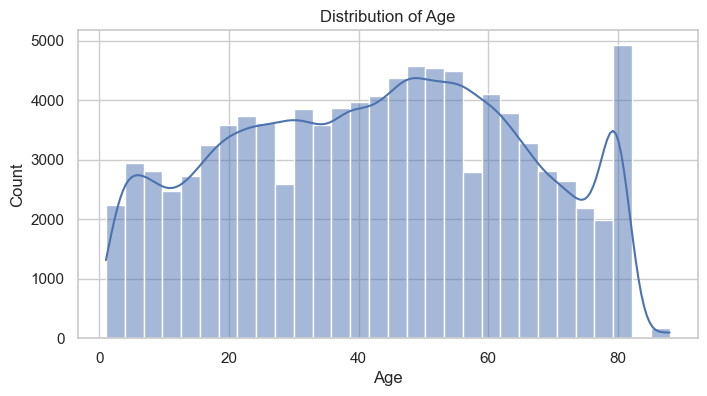

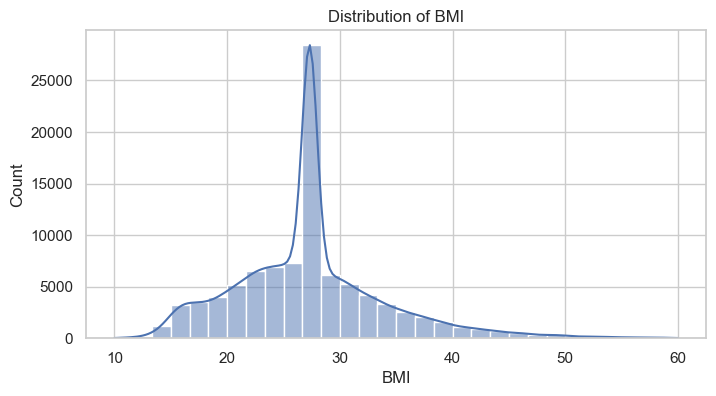

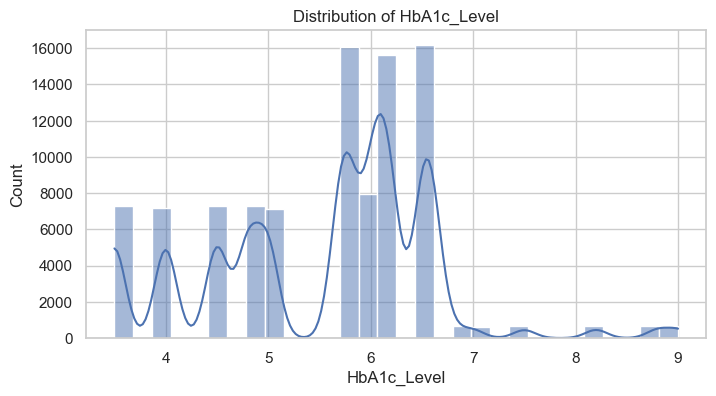

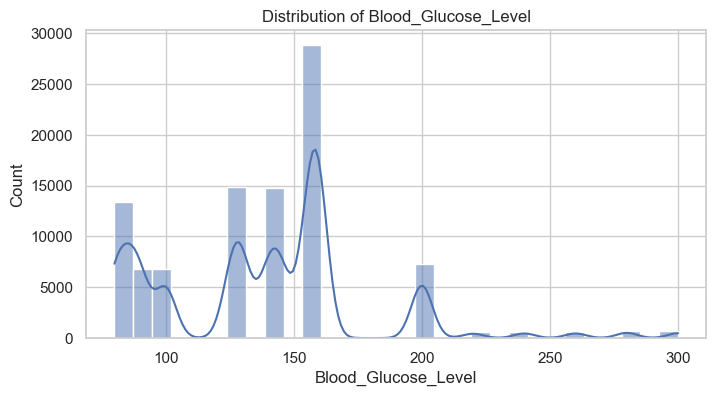

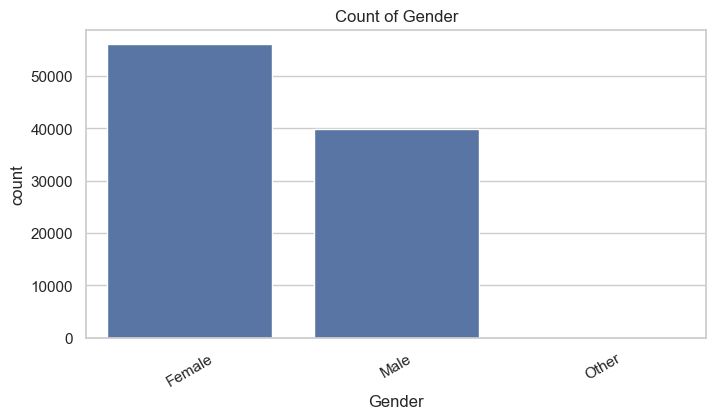

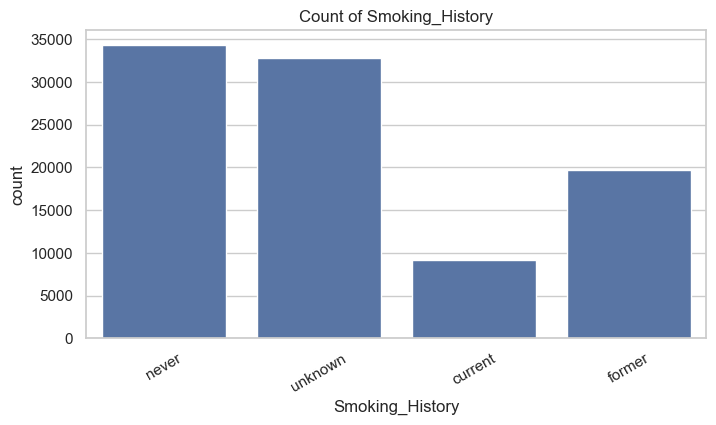

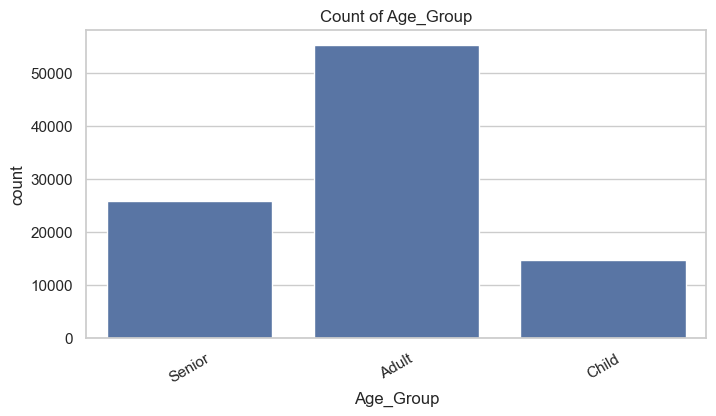

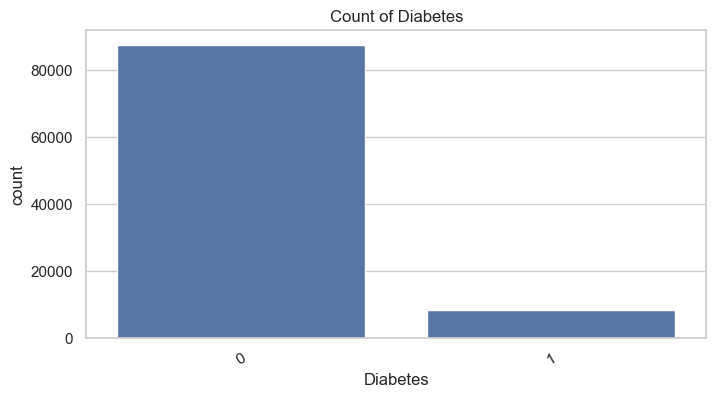

C:\Users\DELL\Downloads\yes\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


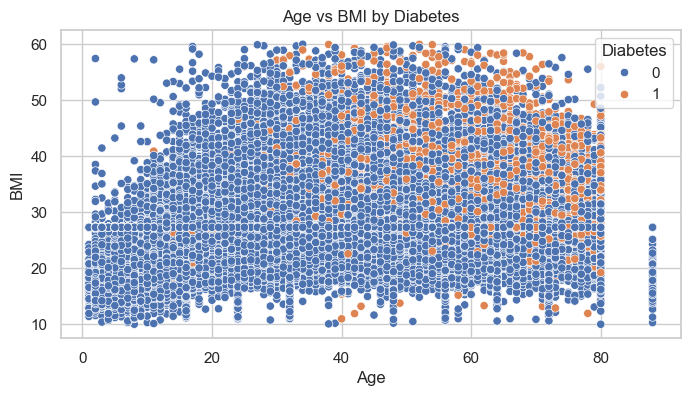

<Figure size 1000x600 with 0 Axes>

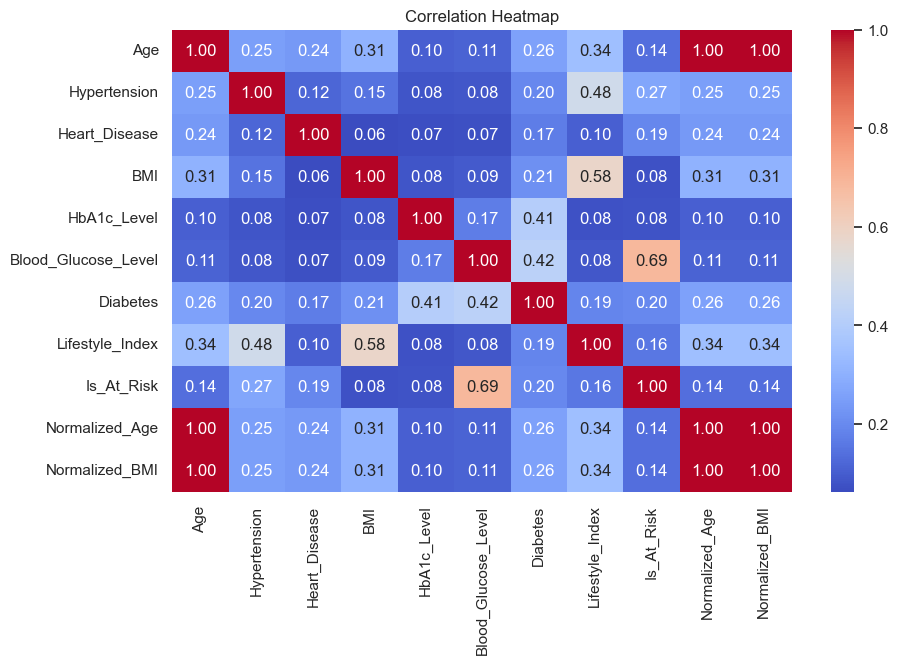

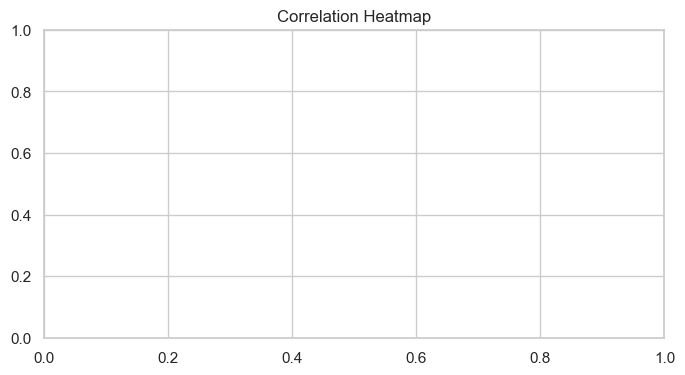

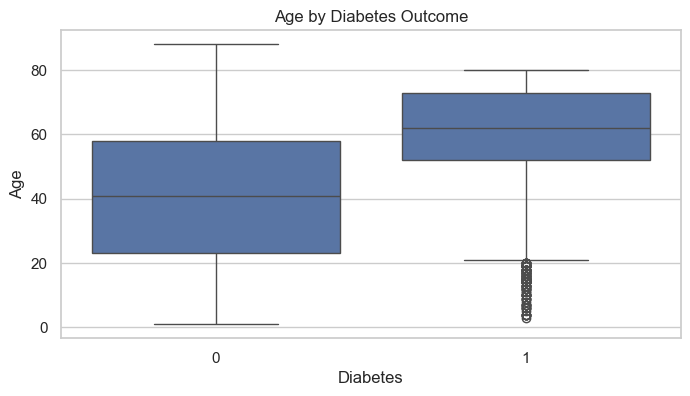

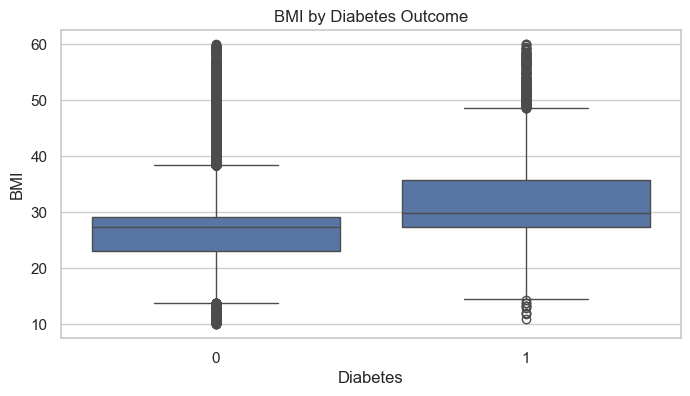

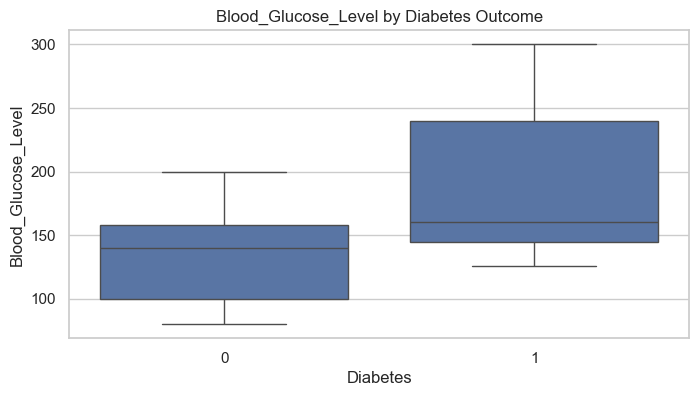

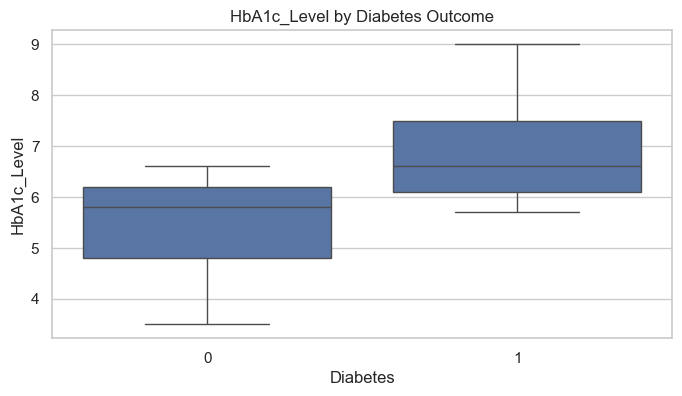

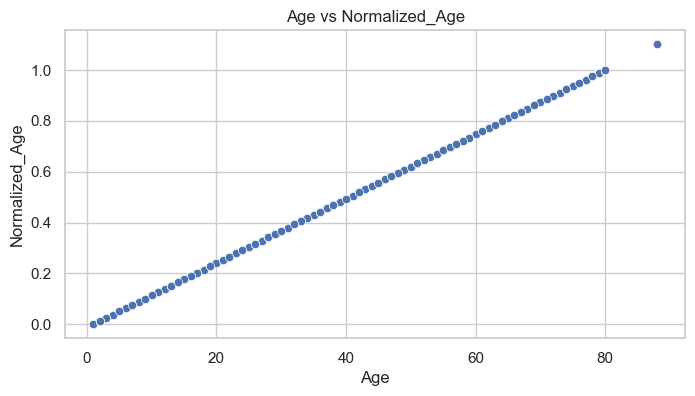

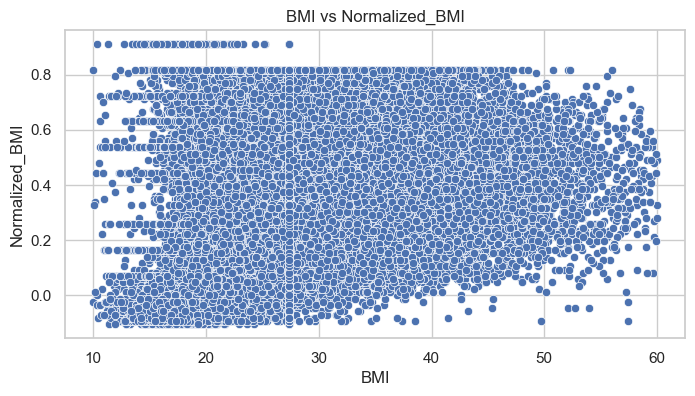

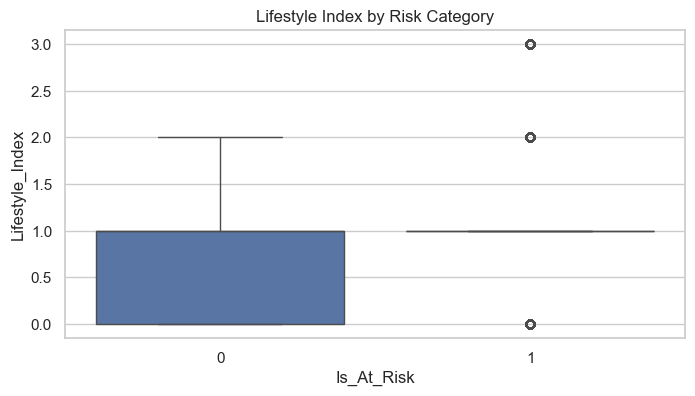

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("cleaned_diabetes_data.csv")

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 4)

# ========== STEP 3: UNIVARIATE ANALYSIS ==========

# 1. Numerical feature distributions
numerical_cols = ['Age', 'BMI', 'HbA1c_Level', 'Blood_Glucose_Level']
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 2. Categorical counts
categorical_cols = ['Gender', 'Smoking_History', 'Age_Group', 'Diabetes']
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=30)
    plt.show()

# ========== STEP 4: BIVARIATE ANALYSIS ==========

# 1. Scatter plots
plt.figure()
sns.scatterplot(x='Age', y='BMI', hue='Diabetes', data=df)
plt.title("Age vs BMI by Diabetes")
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Now generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

plt.title("Correlation Heatmap")
plt.show()

# 3. Diabetes vs Key Features
for col in ['Age', 'BMI', 'Blood_Glucose_Level', 'HbA1c_Level']:
    plt.figure()
    sns.boxplot(x='Diabetes', y=col, data=df)
    plt.title(f'{col} by Diabetes Outcome')
    plt.show()

# ========== STEP 5: FEATURE ENGINEERING VALIDATION ==========

# 1. Check Normalized columns
plt.figure()
sns.scatterplot(x='Age', y='Normalized_Age', data=df)
plt.title("Age vs Normalized_Age")
plt.show()

plt.figure()
sns.scatterplot(x='BMI', y='Normalized_BMI', data=df)
plt.title("BMI vs Normalized_BMI")
plt.show()

# 2. Lifestyle Index vs Is_At_Risk
plt.figure()
sns.boxplot(x='Is_At_Risk', y='Lifestyle_Index', data=df)
plt.title("Lifestyle Index by Risk Category")
plt.show()
